In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
from sklearn.model_selection import train_test_split
# 本代码是能够实现n阶函数拟合数据，优化函数为minibatch SGD

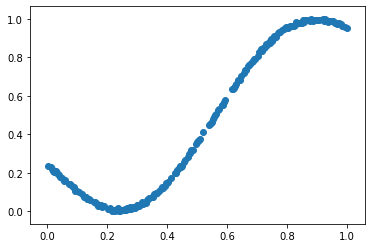

In [4]:
#产生数据集
n_dots = 300 #总数据量

x = np.linspace(0, 1, n_dots)
y = np.sin(2*x)*((x*x-1)**3 + 0.5)+ 0.01*np.random.rand(n_dots);

# 数据归一化
x_max = max(x)
x_min = min(x)
y_max = max(y)
y_min = min(y)

for i in range(0,len(x)):
    x[i] = (x[i] - x_min)/(x_max - x_min)
    y[i] = (y[i] - y_min)/(y_max - y_min)

#划分数据集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
#绘制训练数据集
plt.scatter(x_train,y_train)

In [5]:
#n次函数拟合数据 y=para_1*x**n+para_2*x**(n-1)+...+para_n*x+para_(n+1)
#n次函数
def fun(x,n,para):
    y=0
    for i in range(0 , n+1):
        y = para[i]*x**(n-i)+ y #y=para_1*x**n+para_2*x**(n-1)+...+para_n*x+para_(n+1)
    return y
#函数对para求导
def dfn(y,y_pred,x,n):
    df = [0]*(n+1)
    for i in range(0, n+1):
        df[i] = (y-y_pred)*(-x**(n-i))
    return df
#计算损失
def calc_loss(y,y_p):
    tmp = y_p-y
    tmp = tmp ** 2  
    SSE = sum(tmp) / (2 * len(y))
    return SSE

In [6]:
#打乱数据集
def shuffle_data(x,y):
    # 随机打乱x，y的数据，并且保持x和y一一对应
    seed = random.random()
    random.seed(seed)
    random.shuffle(x)
    random.seed(seed)
    random.shuffle(y)
#获得批量数据
def get_batch_data(x,y,batch):
    shuffle_data(x,y)
    x_new = x[0:batch]
    y_new = y[0:batch]
    return [x_new,y_new]

step: 100 loss: 0.023217573449184847


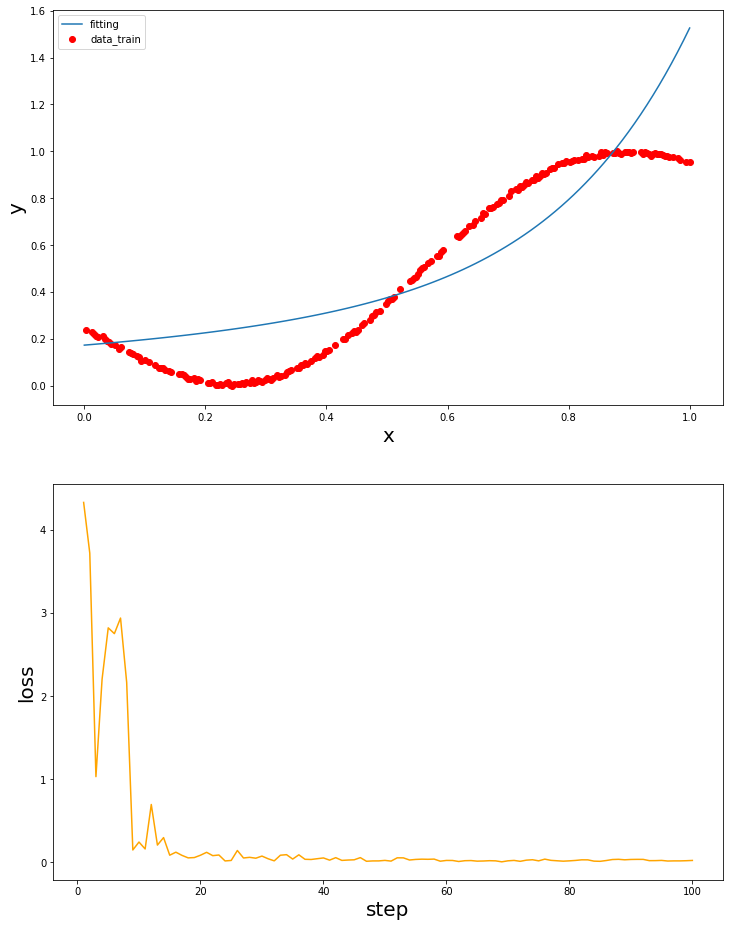

step: 10000 loss: 0.004539664250777447
step: 20000 loss: 0.0026124005966472554
step: 30000 loss: 0.0020938508170757573
step: 40000 loss: 0.0014467488967548118
step: 50000 loss: 0.0019921359044421444
step: 60000 loss: 0.0013531905250457961
step: 70000 loss: 0.0009954347681012255
step: 80000 loss: 0.0009641235681280324
step: 90000 loss: 0.0011366206392192809
step: 100000 loss: 0.0009183912857965192
step: 110000 loss: 0.001206733177305015
step: 120000 loss: 0.0009700348262838332
step: 130000 loss: 0.0007882270444933576
step: 140000 loss: 0.0013637611210164814
step: 150000 loss: 0.0013693884812833283
step: 160000 loss: 0.0008694646658900948
step: 170000 loss: 0.0012081817669369226
step: 180000 loss: 0.000717565253636157
step: 190000 loss: 0.000731163281112416
step: 200000 loss: 0.0008206342761413162
step: 210000 loss: 0.0007147927885819758
step: 220000 loss: 0.0005985895727281404
step: 230000 loss: 0.0006393415241437091
step: 240000 loss: 0.0007131001073682311
step: 250000 loss: 0.00053118

In [7]:
# 初始化a,b值
#使用n阶函数拟合
n = 7 #7阶函数，很奇怪，用7阶还是没有过拟合，感觉是代码可能存在问题，后来发现是训练次数太少了，之前就训练500次，现在设成100万次
para = [1]*(n+1) #初始化n阶函数系数为1
#开始训练
rate = 0.1 # learning rate

all_loss = []
all_step = []

last_para = para

for step in range(1,900000):
    loss = 0
    #选批量数据
    shuffle_data(x_train,y_train)
    [x_new,y_new] = get_batch_data(x_train,y_train,20)
    all_df = [0]*(n+1)
    #计算loss
    for i in range(0,len(x_new)):
        y_p = fun(x_new[i],n,para)
        loss = loss + (y_new[i] - y_p)*(y_new[i] - y_p)/2
        df = np.array(dfn(y_new[i],y_p,x_new[i],n))
        df = np.array(all_df) + np.array(df)
        
    df = df/len(x_new)    
    loss = loss/len(x_new)
    
    all_loss.append(loss)
    all_step.append(step)
    if (step == 100 or step == 900000):
        fig = plt.figure(1, figsize=(12, 16))

        # 绘制回归直线
        plt.subplot(2, 1, 1)
        plt.scatter(x_train, y_train,c="red",label ="data_train")
        x_ = np.linspace(0, 1, 100)
        y_draw = fun(x_,n,para)
        plt.plot(x_, y_draw,label = "fitting")
        plt.legend()
        plt.xlabel("x",fontsize=20)
        plt.ylabel("y",fontsize=20)

        # 绘制loss更新曲线
        plt.subplot(2,1,2)
        plt.plot(all_step,all_loss,color='orange')
        plt.xlabel("step",fontsize=20)
        plt.ylabel("loss",fontsize=20)
        
        print("step:",step,"loss:",loss)
        plt.show()
        plt.pause(0.01)
    if (step%10000 == 0 ):
        print("step:",step,"loss:",loss)
    
    #更新系数值
    last_para = para 
    para = np.array(para) - np.array(rate*df)
    
    if step == 100:
        rate = rate/2
    if step == 200:
        rate = rate/2
        
print("函数阶数为",n,"函数系数为：",last_para)

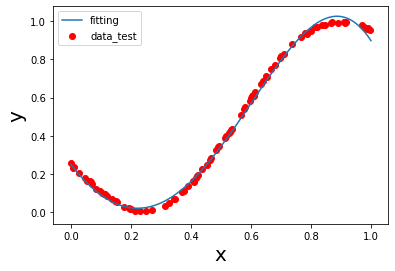

In [8]:
#使用训练模型对测试集进行预测
# 绘制测试集数据与预测模型直线
plt.scatter(x_test, y_test,c="red",label ="data_test")
x_ = np.linspace(0, 1, 100)
y_draw = fun(x_,n,para)
plt.plot(x_, y_draw,label = "fitting")
plt.legend()
plt.xlabel("x",fontsize=20)
plt.ylabel("y",fontsize=20)
plt.show()

In [9]:
#计算测试集下loss
y_test_pred = fun(x_test,n,para)
test_loss = calc_loss(y_test,y_test_pred)
print("训练集loss为：",test_loss)

训练集loss为： 0.00020440545822285577
